#### Data can be classified as -Numerical & categorical
    * Exploratory data analytics
    * Categorical
        * Nominal - no relation to other data values (no such thing one car make is better than other) - use hot encoding
        * ordinal - relation exists (Student grades - A is better than B) - use label encoding
        * Binary - T or F

### Classification - Logistic regression
##### 1/1+c^-y - where 1<y<0 - make data probability between 0 and 1
* this should separate data points in classifications - point belong to one class or the other is either 0 or 1

In [1]:
import pandas as pd


In [2]:
data=pd.read_csv('adult.data',names=["age","workclass","fnlwgt","education",
                                     "education-num","marital-status","occupation","relationship",
                                     "race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]
                 ,index_col=False
                )
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data['salary'].unique()

In [ ]:
data[['education-num','salary']].head()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## Logistic regression need x=2d array and y=1d (column)

In [ ]:
logr=LogisticRegression()
logr.fit(data['education-num'].values.reshape(-1,1) , data['salary'].values)

In [ ]:
# Predict if given value of education-num will give >50K or <=50K

In [ ]:
import numpy as np
logr.predict(np.array([15]).reshape(-1,1))

In [ ]:
## Probability of <=50k is 0.39 and prob of >50k is 0.60
logr.predict_proba(np.array([15]).reshape(-1,1))

In [ ]:
logr.classes_

In [ ]:
ypred = logr.predict(data['education-num'].values.reshape(-1,1))
ypred

In [ ]:
logr.intercept_

In [ ]:
logr.coef_

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
data['salary'].value_counts()

In [ ]:
## o/p is matrix as shown below
## columns are predicted from model, rows are original
## > 50k -  1688,23696 correctly classified , mis classified 1024,6153
## Help identify false positives. It is better to be false positive than false negative
pd.DataFrame(confusion_matrix(data['salary'],ypred) , columns=logr.classes_ , index = logr.classes_)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
## Accuracy score of the model
accuracy_score(data['salary']  , ypred)

In [ ]:
## no of correct predictions / total pred = accuracy
(23696+1688)/(23696+1688+1024+6153)

### Multi class classification
#### Boundaries drawn between multiple classes

In [ ]:
## Exercise

In [ ]:
### SVM - support vector machines - will draw linear line to separate data points
### Will work with regression and classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()
svc_model
## kernal=rbf -radial basis function- uses to transform data from x.y to new space

In [ ]:
svc_model.fit(data['education-num'].values.reshape(-1,1) , data['salary'])

In [ ]:
ypred=svc_model.predict(data['education-num'].values.reshape(-1,1))
ypred

In [ ]:
pd.DataFrame(confusion_matrix(data['salary'] , ypred) , columns=svc_model.classes_ , index=svc_model.classes_)

In [ ]:
## Score is same as model above - we need to tune hyper parameters to get better result
accuracy_score(data['salary'] , ypred)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
## Refer for hyper parameter tuning
## https://www.kaggle.com/anand0427/classification-for-beginners

In [ ]:
## Change kernel to Polynomial to see if accuracy improves
svc_model_1 = SVC(kernel='poly')

In [ ]:
svc_model_1.fit(data['education-num'].values.reshape(-1,1) , data['salary'])
ypred_1=svc_model_1.predict(data['education-num'].values.reshape(-1,1))
pd.DataFrame(confusion_matrix(data['salary'] , ypred_1) , columns=logr.classes_ , index=logr.classes_)

### Classification algo : KNN - K's nearest neighbors
* Classes - 1 - X, 0 - O
* IT does not do training of models
* Take K value and find how many nearest neighbors we can find. Get most frequent class amongst neighbors , applies that class to point.
* k=3 , try to identify 3 neighbors, found 2x 1O neighbors, K will be classified as X
* If we have 2 classes, never take K as divisible to 2, else we may get equal parts and not find most frequent neighbors

* Min Max scalar - scaling data betn 0 to 1
    * For x as feature, 
    * Xi-min(x) / max(x)-min(x)
        * for Xi=min(x) , this functions gives 0. for Xi=max(i) value is 1.

In [4]:
data[['education-num','salary']].head()

,education-num,salary
0,13,<=50K
1,13,<=50K
2,9,<=50K
3,7,<=50K
4,13,<=50K


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
mms = MinMaxScaler()
## This is scaling model not ML, so fit is not actually training
mms.fit(data['education-num'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [9]:
mms.data_min_

array([ 1.])

In [10]:
mms.data_max_

array([ 16.])

In [12]:
## Min=1, Max=16. Transform will transform all datapoints with return values between 0 and 1
data['scaled education-num']=mms.transform(data['education-num'].values.reshape(-1,1))

In [14]:
data['scaled education-num'].min()

0.0

In [15]:
data['scaled education-num'].max()

1.0

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
## Specify K values as 3. Default is 5.
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(data['scaled education-num'].values.reshape(-1,1),
       data['salary'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [21]:
kpred = knc.predict(data['scaled education-num'].values.reshape(-1,1))
kpred

array([' >50K', ' >50K', ' >50K', ..., ' >50K', ' >50K', ' >50K'], dtype=object)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [23]:
pd.DataFrame(confusion_matrix(data['salary'] , kpred),
                columns=knc.classes_ , index=knc.classes_)

,<=50K,>50K
<=50K,11698,13022
>50K,2951,4890


In [25]:
accuracy_score(data['salary'], kpred)

0.50944381315070175

In [27]:
## Improve it by automating which K value gives best result

lst=[]
for i in range(3,15,2):
    knc=KNeighborsClassifier(n_neighbors=i)
    knc.fit(data['scaled education-num'].values.reshape(-1,1),
       data['salary'])
    kpred = knc.predict(data['scaled education-num'].values.reshape(-1,1))
    ## Add all accuracy scores in a list
    ac_score= accuracy_score(data['salary'], kpred)
    print("K:",i," score:",ac_score)
    lst.append(ac_score)
    


K: 3  score: 0.509443813151
K: 5  score: 0.509443813151
K: 7  score: 0.757102054605
K: 9  score: 0.757102054605
K: 11  score: 0.773594177083
K: 13  score: 0.773594177083


In [30]:
%matplotlib inline

In [31]:
# Plot on line
import matplotlib.pyplot as plt


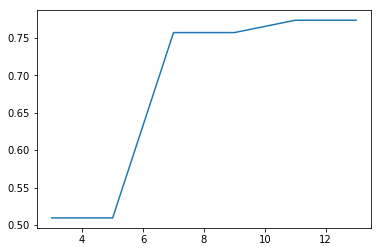

In [34]:
plt.plot(range(3,15,2),lst)
## Point where we can stop looking for K is elbow point, sharp increase in accuracy - for this data, K=7 is elbow point

### Standard scaler
* If trained data is scaled, we need to scale test data too
* Fit and transform training data, transform/scale test data with min and max of training data
* That is why we need standard scaling, which transforms data by x- mean/std deviation
    * z = (x-u)/s

In [35]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss=StandardScaler()
ss.fit(data['education-num'].values.reshape(-1,1) )
data['ss education-num']=ss.transform(data['education-num'].values.reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [42]:
## Lets try with KNN with K=7
knc=KNeighborsClassifier(n_neighbors=7)
knc.fit(data['ss education-num'].values.reshape(-1,1),
      data['salary'])
kpred = knc.predict(data['ss education-num'].values.reshape(-1,1))
## Add all accuracy scores in a list
ac_score= accuracy_score(data['salary'], kpred)
ac_score

0.75710205460520252

### K-Means clustering
* May look simliar to K-NN, but K-means is unsupervised
* keep plane distributed, no need for normalization
* When we do not know classes
* there is no y needed in training
* Start with choosing k=n, set random datapoints (centroid) across x,y axes on plane. Check neighbors around centroid and form cluster
* adjust position of centroid by taking mean of all points in that cluster, will give us new cluster
* Now, keep checking all points, which points closest to centroid and form new cluster
* keep going untill there is very little change in centroid positioning


In [43]:
from sklearn.cluster import KMeans

In [ ]:
plt.scatter(data['education-num'] , data['capital-gain'])

In [46]:
km=KMeans(n_clusters=3)
km.fit(data[['education-num','capital-gain']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
## Centroids
km.cluster_centers_

array([[  9.98977459e+00,   1.34830380e+02],
       [  1.29182390e+01,   9.99990000e+04],
       [  1.19040675e+01,   1.15091274e+04]])

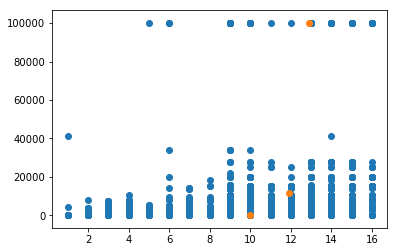

In [49]:
plt.scatter(data['education-num'] , data['capital-gain'])
## Plot centroids, x=rows, y =columns
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])

In [51]:
## See data from all centroid clusters and then form plot from those data points
# Labels will give number of cluster this data belongs to - 0-2, as our cluster size is 3
## Data in 0th cluster are
data.loc[km.labels_ == 0 , 'education-num']

0        13
1        13
2         9
3         7
4        13
5        14
6         5
7         9
9        13
10       10
11       13
12       13
13       12
14       11
15        4
16        9
17        9
18        7
19       14
20       16
21        9
22        5
23        7
24        9
25       13
26        9
27       10
28        9
29        9
30       12
         ..
32529     9
32530    13
32531    13
32532    16
32533    13
32534    10
32535     8
32536    13
32537     9
32539    16
32540     9
32541     9
32542     9
32543    12
32544    14
32545    12
32546    12
32547     9
32548    15
32549    10
32550    10
32551     6
32552    11
32553    14
32554    14
32555    10
32556    12
32557     9
32558     9
32559     9
Name: education-num, Length: 31099, dtype: int64

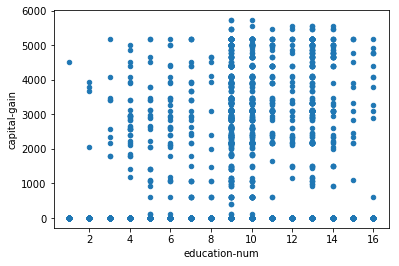

In [53]:
## Cluster 0- all data points
data.loc[km.labels_ == 0 , ['education-num','capital-gain']].plot(x='education-num', y='capital-gain',kind='scatter')

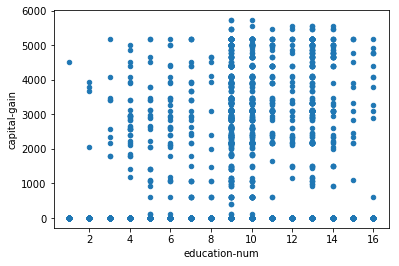

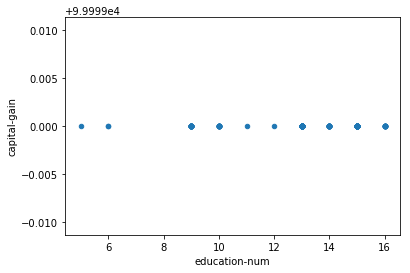

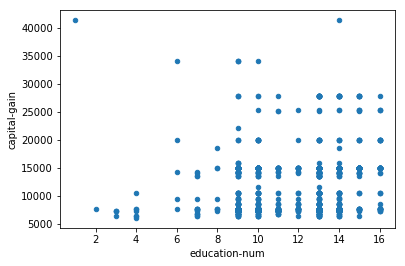

In [54]:
## For all 3 clusters
data.loc[km.labels_ == 0 , ['education-num','capital-gain']].plot(x='education-num', y='capital-gain',kind='scatter')
data.loc[km.labels_ == 1 , ['education-num','capital-gain']].plot(x='education-num', y='capital-gain',kind='scatter')
data.loc[km.labels_ == 2 , ['education-num','capital-gain']].plot(x='education-num', y='capital-gain',kind='scatter')

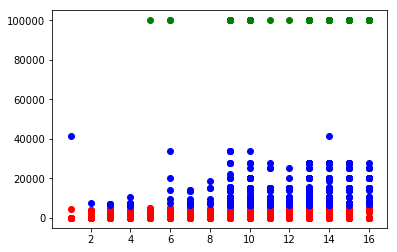

In [61]:
x0=data.loc[km.labels_ == 0 , 'education-num']
y0=data.loc[km.labels_ == 0 , 'capital-gain']
x1=data.loc[km.labels_ == 1 , 'education-num']
y1=data.loc[km.labels_ == 1 , 'capital-gain']
x2=data.loc[km.labels_ == 2 , 'education-num']
y2=data.loc[km.labels_ == 2 , 'capital-gain']
plt.scatter(x0,y0,c='r')
plt.scatter(x1,y1,c='g')
plt.scatter(x2,y2,c='b')


### Neural networks
* I/P -> Neuron (hidden layer) with intercept - bias, coef-weights passed to sigmoid function -> o/p
* sigmoid function - activation function
* We can have more neurons. this o/p will fed in other logistic reg to get final o/p
* More neuron layers - deep learning
* bias and weight will be adjusted as we have more neurons
* Tensorflow playground to examples

* To run neural network we need GPU. Normal computer do not have it. Google colab provides GPU to test run
    colab.research.google.com
    
    * MLP Classifier in sklear to do neural network in normal computer

In [62]:
from sklearn.neural_network import MLPClassifier

In [64]:
mlp=MLPClassifier()
mlp.fit(data['education-num'].values.reshape(-1,1),data['salary'])
mpred=mlp.predict(data['education-num'].values.reshape(-1,1))
## Add all accuracy scores in a list
ac_score= accuracy_score(data['salary'], mpred)
ac_score

0.77958293664199507